In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from customUtils import *

pd.set_option('display.max_columns', None)

In [2]:
# All trials with Epilepsy as key term
# https://clinicaltrials.gov/ct2/results?cond=Epilepsy&age_v=&gndr=&type=&rslt=&Search=Apply

#Parameters
csv_file = './data/SearchResults.csv'
date_columns = ['Start Date', 'Primary Completion Date', 
                'Completion Date', 'First Posted', 
                'Results First Posted', 'Last Update Posted']

data = pd.read_csv(csv_file)
data_cleaned = data.copy(deep=True)

In [3]:
data.head(2)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04944641,Epilepsy Prevalence and Intervention Study in ...,NaN,Recruiting,No Results Available,Epilepsy,Behavioral: education on epilepsy|Drug: routin...,Change from baseline seizures frequency 1|Chan...,"Second Affiliated Hospital, School of Medicine...",All,"14 Years and older (Child, Adult, Older Adult)",Not Applicable,200.0,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,2013-032,"September 13, 2013","September 30, 2022","December 31, 2022","June 29, 2021",NaN,"July 19, 2021","2nd Affiliated Hospital, School of Medicine, Z...",NaN,https://ClinicalTrials.gov/show/NCT04944641
1,2,NCT05384782,Computational Decision Support in Epilepsy Usi...,NaN,Completed,No Results Available,Epilepsy,NaN,To validate a set of computational biomarkers ...,Cornwall Partnership NHS Foundation Trust|Neur...,All,"18 Years and older (Adult, Older Adult)",NaN,825.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,Version 10|260729,"December 1, 2019","December 31, 2021","March 31, 2022","May 20, 2022",NaN,"May 20, 2022","Cornwall Partnership NHS Foundation Trust, Bod...","""Study Protocol"", https://ClinicalTrials.gov/P...",https://ClinicalTrials.gov/show/NCT05384782


## Date Columns

Date columns defined as: ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted']  


In [4]:
for date_col in date_columns:
    #print(date_col)
    data_cleaned[date_col] = data_cleaned[date_col].apply(clean_date)
    gen_future_flag(data_cleaned, date_col)
gen_out_of_order_flag(data_cleaned, ['Start Date', 'Primary Completion Date'])
#Example data report
example_date_report = gen_date_report_df(data_cleaned, date_columns)        

In [5]:
short_cols = ['NCT Number', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Start Date Future Flag',
       'Primary Completion Date Future Flag', 'Completion Date Future Flag',
       'First Posted Future Flag', 'Results First Posted Future Flag',
       'Last Update Posted Future Flag',
       'Start Date & Primary Completion Date Invalid Order Flag']

In [6]:
cleaned_dates = gen_full_date_report(data_cleaned, short_cols)

In [7]:
cleaned_dates.sample(10)

,NCT Number,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Start Date Future Flag,Primary Completion Date Future Flag,Completion Date Future Flag,First Posted Future Flag,Results First Posted Future Flag,Last Update Posted Future Flag,Start Date & Primary Completion Date Invalid Order Flag
1786,NCT01871233,NaT,NaT,NaT,2013-06-06,NaT,2020-04-16,0,0,0,0,0,0,1
438,NCT02207673,2014-11-01,2021-02-01,2021-06-01,2014-08-04,NaT,2020-11-04,0,0,0,0,0,0,0
1267,NCT01832038,2013-03-26,2019-07-31,2019-07-31,2013-04-15,2020-08-13,2021-08-17,0,0,0,0,0,0,0
212,NCT02447198,2015-11-02,2018-09-11,2018-09-11,2015-05-18,NaT,2018-10-30,0,0,0,0,0,0,0
1200,NCT00179517,2001-06-01,2008-04-01,2008-04-01,2005-09-16,2017-08-08,2019-07-17,0,0,0,0,0,0,0
742,NCT00310388,2006-07-05,2017-04-18,2018-05-24,2006-04-03,2018-06-06,2018-11-15,0,0,0,0,0,0,0
1638,NCT00662506,2008-04-01,2014-04-01,2014-04-01,2008-04-21,NaT,2017-09-21,0,0,0,0,0,0,0
1298,NCT03489044,2018-10-28,2022-12-01,2022-12-01,2018-04-05,NaT,2021-04-28,0,1,1,0,0,0,0
1730,NCT04882540,2021-05-19,2021-06-08,2021-06-08,2021-05-12,NaT,2021-07-09,0,0,0,0,0,0,0
1635,NCT01942525,2010-06-01,2013-09-01,2013-09-01,2013-09-16,NaT,2013-09-16,0,0,0,0,0,0,0


In [8]:
example_date_report

,Column,Total Count,Null Count,Invalid Date Count,Future Date Count,Current Date Count,Null Percent,Invalid Date Percent,Future Date Percent
0,Start Date,1826,25,0,24,1777,1.37,0.0,1.31
1,Primary Completion Date,1826,141,0,401,1284,7.72,0.0,21.96
2,Completion Date,1826,59,0,452,1315,3.23,0.0,24.75
3,First Posted,1826,0,0,0,1826,0.00,0.0,0.00
4,Results First Posted,1826,1463,0,0,363,80.12,0.0,0.00
5,Last Update Posted,1826,0,0,0,1826,0.00,0.0,0.00


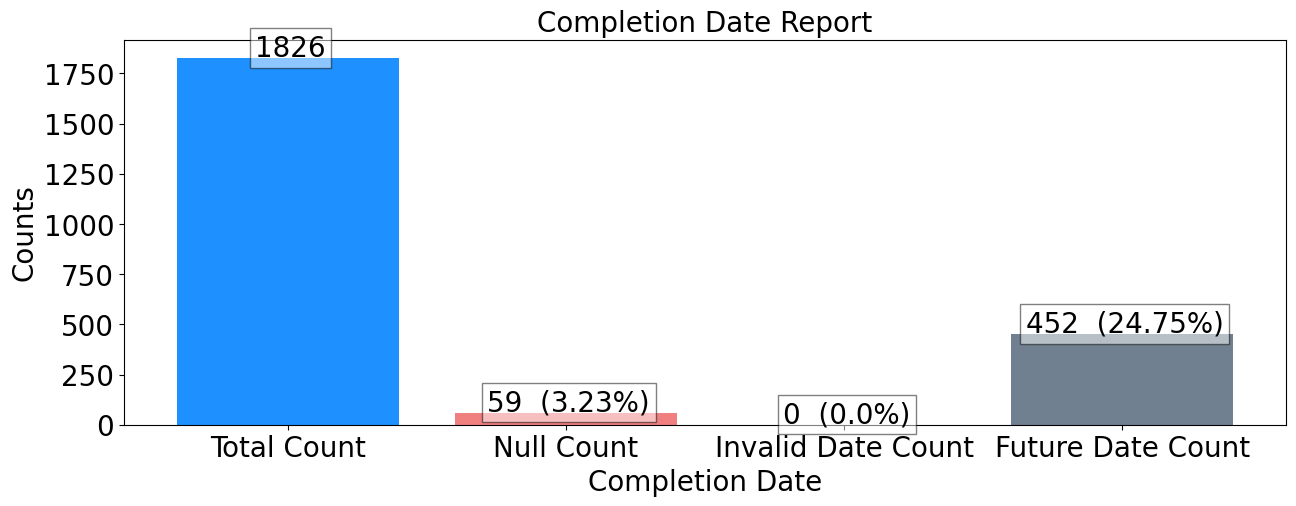

In [9]:
#Look at specific column
n = 2 #Default 2
gen_date_plot(example_date_report.iloc[n])

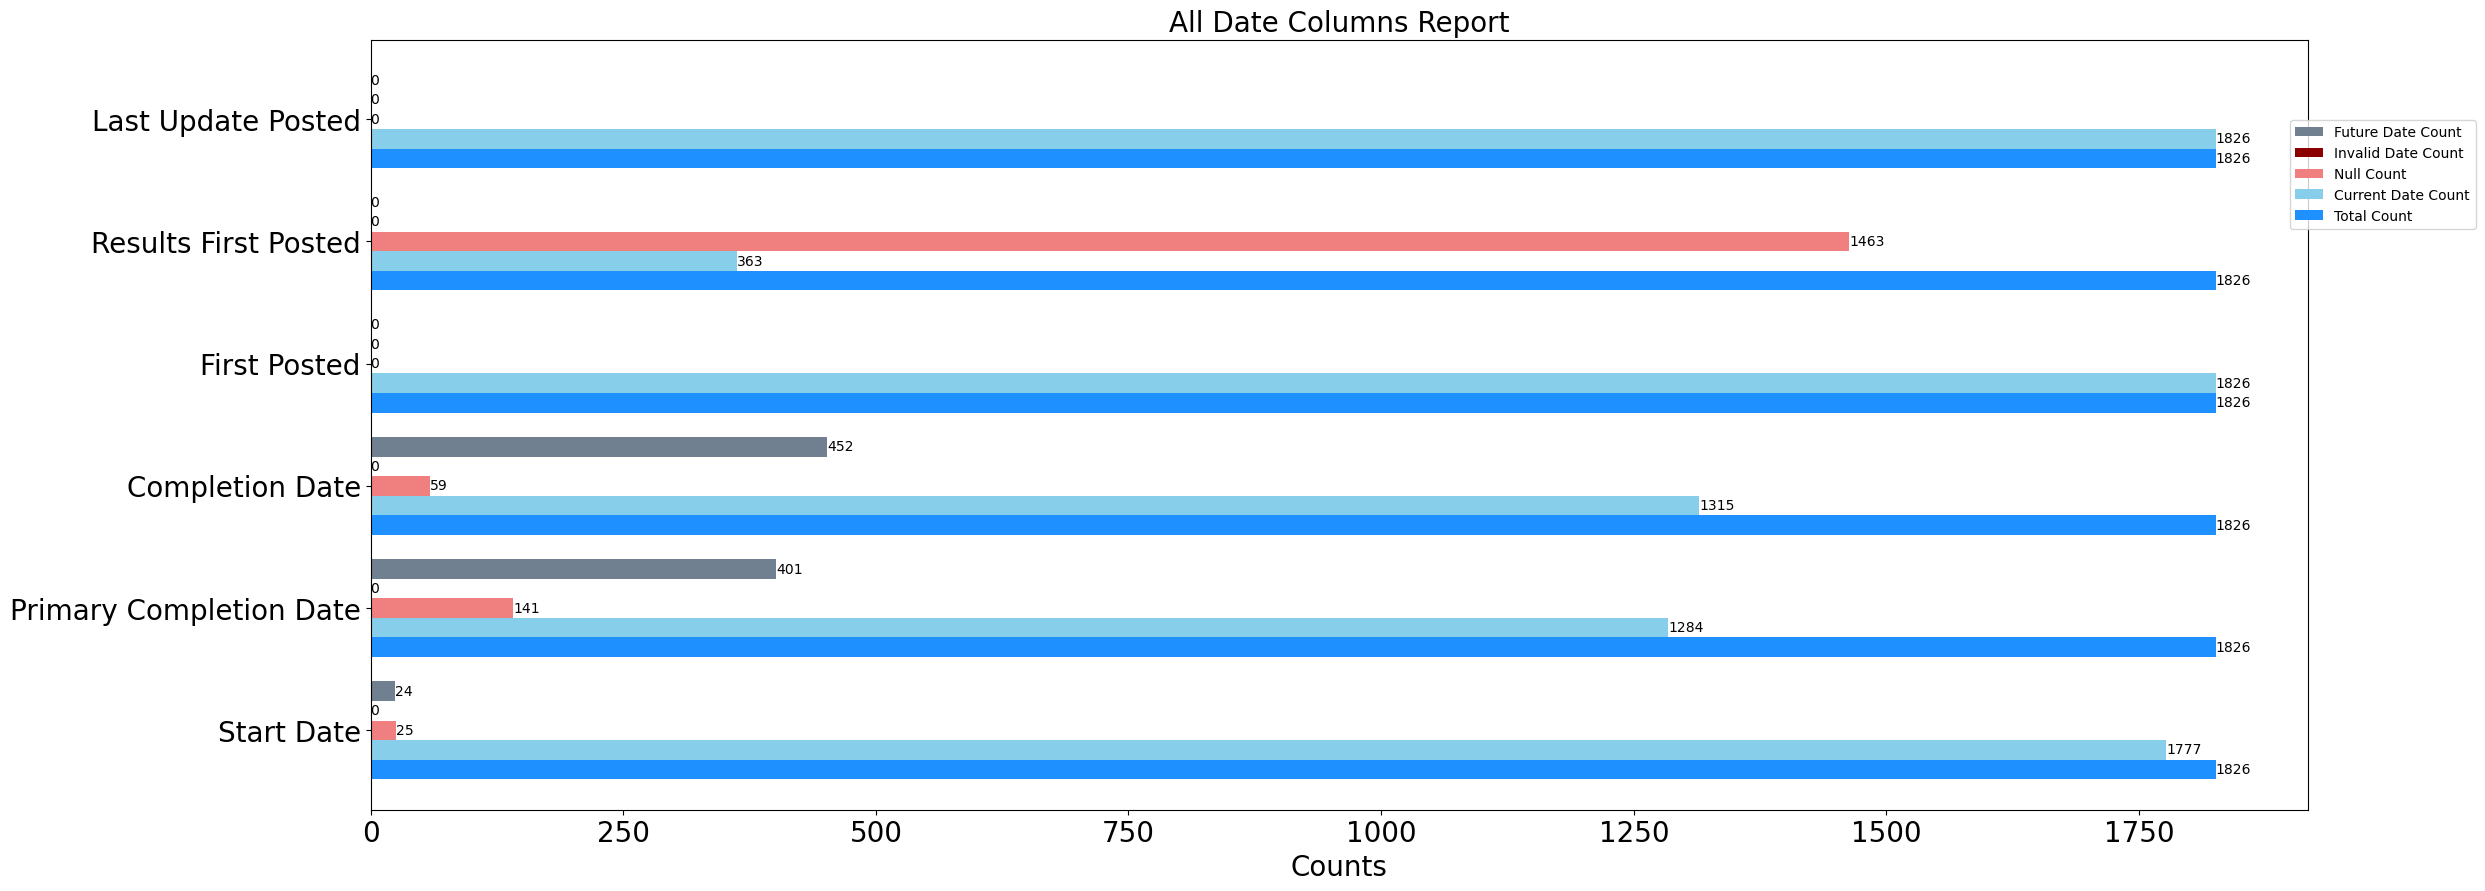

In [10]:
gen_date_overview_plot(example_date_report)

## Age Column

In [11]:
data_cleaned['Age'] = data_cleaned['Age'].apply(clean_age)
data_cleaned[['Age Range', 'Age Category']] = pd.DataFrame(data_cleaned['Age'].to_list())

In [12]:
data['Age'].head(2)

0    14 Years and older   (Child, Adult, Older Adult)
1           18 Years and older   (Adult, Older Adult)
Name: Age, dtype: object

In [13]:
data_cleaned[['NCT Number', 'Age Range', 'Age Category']].sample(10)

,NCT Number,Age Range,Age Category
337,NCT00982787,18 years to 70 years,adult | older adult
450,NCT02635633,18 years to 65 years,adult | older adult
1419,NCT00643136,18 years and older,adult | older adult
1139,NCT00625222,12 years and older,child | adult | older adult
1610,NCT05317091,18 years to 65 years,adult | older adult
739,NCT00001666,N/A,child | adult | older adult
1622,NCT04055532,18 years and older,adult | older adult
1697,NCT05085704,16 years to 65 years,child | adult | older adult
156,NCT03644082,18 years to 55 years,adult
405,NCT03239691,18 years to 60 years,adult
